In [1]:
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
def read_tsv(filename):
    import csv
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        return {str(row[0]): float(row[1]) for row in reader}

In [3]:
def img_to_np(filename):
    import imageio
    im = imageio.imread(filename)
    print(im.shape)
    return im

In [8]:
class ICG(object):
    """
    Modified from original ImageColorGenerator
    Color generator based on a color image.
    Generates colors based on an RGB image. A word will be colored using
    the mean color of the enclosing rectangle in the color image.
    After construction, the object acts as a callable that can be passed as
    color_func to the word cloud constructor or to the recolor method.
    Parameters
    ----------
    image : nd-array, shape (height, width, 3)
        Image to use to generate word colors. Alpha channels are ignored.
        This should be the same size as the canvas. for the wordcloud.
    default_color : tuple or None, default=None
        Fallback colour to use if the canvas is larger than the image,
        in the format (r, g, b). If None, raise ValueError instead.
    """


    # returns the average color of the image in that region
    def __init__(self, image, default_color=None):
        import numpy as np
        if image.ndim not in [2, 3]:
            raise ValueError("ImageColorGenerator needs an image with ndim 2 or"
                             " 3, got %d" % image.ndim)
        if image.ndim == 3 and image.shape[2] not in [3, 4]:
            raise ValueError("A color image needs to have 3 or 4 channels, got %d"
                             % image.shape[2])
        self.image = image
        self.default_color = default_color

    def __call__(self, word, font_size, font_path, position, orientation, **kwargs):
        """Generate a color for a given word using a fixed image."""
        # get the font to get the box size
        from PIL import ImageFont
        import numpy as np
        font = ImageFont.truetype(font_path, font_size)
        transposed_font = ImageFont.TransposedFont(font,
                                                   orientation=orientation)
        # get size of resulting text
        box_size = transposed_font.getsize(word)
        x = position[0]
        y = position[1]
        # cut out patch under word box
        patch = self.image[x:x + box_size[0], y:y + box_size[1]]
        if patch.ndim == 3:
            # drop alpha channel if any
            patch = patch[:, :, :3]
        if patch.ndim == 2:
            raise NotImplementedError("Gray-scale images TODO")
        # check if the text is within the bounds of the image
        reshape = patch
        color = patch[:, :,:]
        color = np.mean(color, axis = 0)
        color = np.mean(color, axis = 0)
        color = np.round(color)
        color = color.astype(int)
        color = color.clip(10, 255)
        return "rgb({:d}, {:d}, {:d})".format(color[0], color[1], color[2])

In [18]:
corgi_image = img_to_np("corgi-clipart-small-4.png")
text = read_tsv("tail.csv")

(1600, 1600, 4)


In [19]:
wc = WordCloud(background_color="white", max_words=1000,  mask=corgi_image, width=1600, height=1600)
wc.generate_from_frequencies(text)

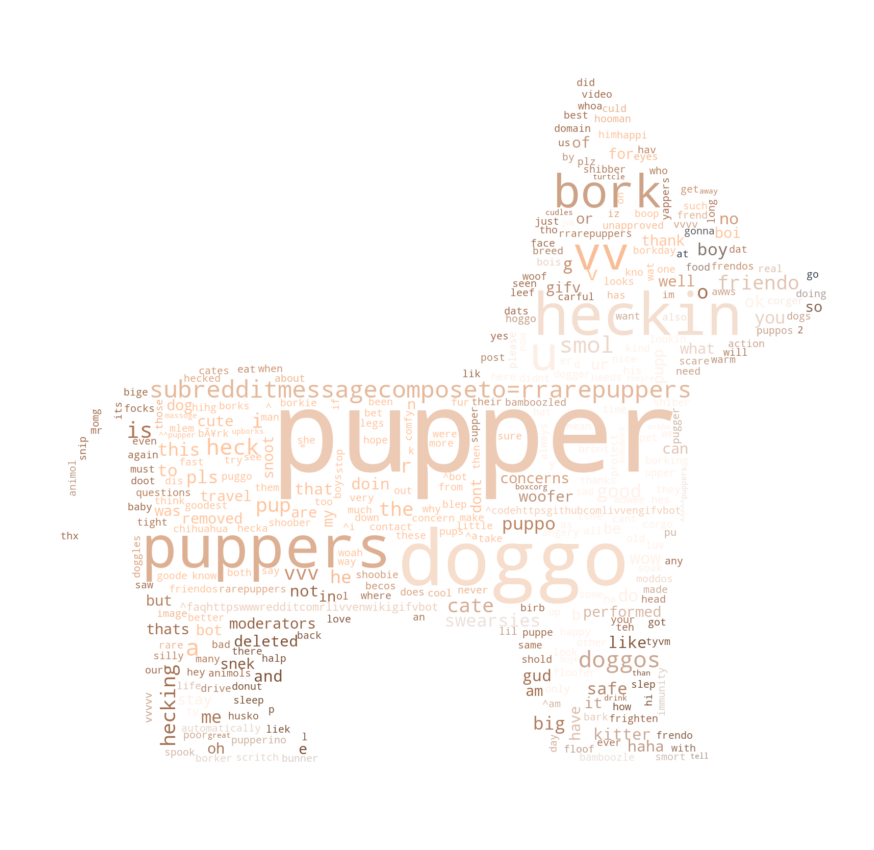

In [20]:
corgi_color_gen = ICG(corgi_image)
plt.figure(figsize = [15, 15])
plt.imshow(wc.recolor(color_func=corgi_color_gen), interpolation="bilinear")
plt.axis("off")
plt.show()